<a href="https://colab.research.google.com/github/rudie999/PCVK/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>NAMA : M Rohmatul Mauludi
>
>KELAS : TI--3A
>
>NIM : 2141720062
>
>GITHUB :

**PRAKTIKUM**

# 1. Buatlah fungsi konvolusi menggunakan algoritma yang telah dijelaskan pada Bagian C, tanpa menggunakan library atau metode konvolusi dari OpenCV.

# 2. Berikut merupakan langkah-langkah yang dapat dilakukan:

a. Buat notebook baru pada google colab, dan beri nama Week7.ipynb. Simpan Salinan pada akun github seperti pada modul sebelumnya.

b. Akses file yang terdapat pada drive dan import beberapa library yang dibutuhkan

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im


c. Buatlah fungsi konvolusi. Catatan: parameter yang digunakan boleh dimodifikasi. Misal, hanya menggunakan parameter image dan kernel saja, atau image, kernel, dan padding.

**Fungsi Konvolusi**

In [5]:
def convolution2d(image, kernel, stride, padding):
  image = np.pad(image, padding, mode='constant', constant_values=0)

  #height dan width dari kernel dan citra padding
  paddingheight, paddingwidth = image.shape
  kernelheight, kernelwidth = kernel.shape

  #menenteukan output
  outputheight = (paddingheight - kernelheight) // stride + 1
  outputwidth = (paddingwidth - kernelwidth) // stride + 1

  new_image = np.zeros((outputheight, outputwidth)).astype(np.float32)

  for y in range(0, outputheight):
    for x in range(0, outputwidth):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernelheight, x * stride:x * stride + kernelwidth] * kernel).astype(np.float32)
  return new_image

d. Load citra yang akan diproses dan ubah menjadi citra keabuan

**Load Image and Change to Grayscale**

In [6]:
img = cv.imread('/content/sample_data/female.tiff')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)


e. Tentukan kernel yang akan digunakan, contohnya kernel untuk filter sharpening sebagai berikut:

**Tentukan Kernel dan panggil fungsi Convolution**

In [9]:
#image SHARPEN

kernel_sharpen = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])


f. Memanggil fungsi konvolusi yang telah dibuat sebelumnya, dan menampilkan hasil konvolusinya:

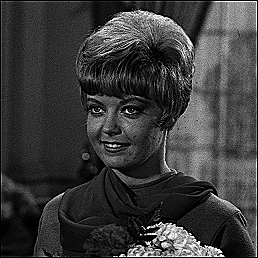

In [10]:
cv2_imshow(convolution2d(img_gray, kernel_sharpen,1,2))

# 3. Buat Image Filter untuk Average filter, low pass filter, high pass filter, dan beberapa filter berikut:

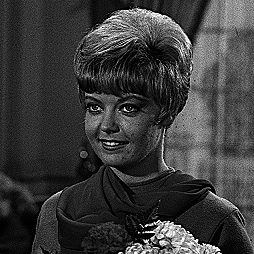

In [11]:
#SHARPEN

sharpen = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])
cv2_imshow(convolution2d(img_gray, sharpen,1,0))

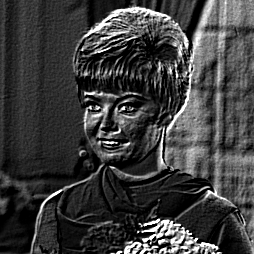

In [12]:
#EMBOSS

emboss = np.array([[-2, -1, 0],
                   [-1, 1, 1],
                   [0, 1, 2]])
cv2_imshow(convolution2d(img_gray, emboss,1,0))

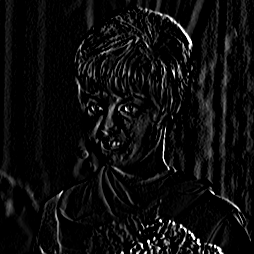

In [13]:
#Left Sobel Edge Detection

leftsobeledge = np.array([[1, 0, -1],
                          [2, 0, -2],
                          [1, 0, -1]])
cv2_imshow(convolution2d(img_gray, leftsobeledge,1,0))


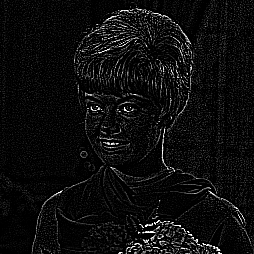

In [14]:
#Canny Edge Detection

cannyedge = np.array([[-1, -1, -1],
                      [-1, 8, -1],
                      [-1, -1, -1]])
cv2_imshow(convolution2d(img_gray, cannyedge,1,0))

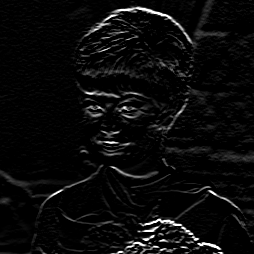

In [15]:
#Prewit Edge Detection

prewitedge = np.array([[-1, -1, -1],
                      [0, 0, 0],
                      [1, 1, 1]])
cv2_imshow(convolution2d(img_gray, prewitedge,1,0))

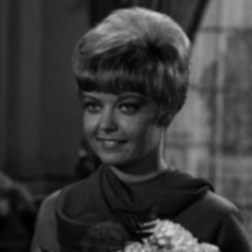

In [16]:
#5x5 Gaussian Blur

gaussian_5x5 = (1/256) * np.array([[1, 4, 6, 4, 1],
                                  [4, 16, 24, 16, 4],
                                  [6, 24, 36, 24, 6],
                                  [4, 16, 24, 16, 4],
                                  [1, 4, 6, 4, 1]])
cv2_imshow(convolution2d(img_gray, gaussian_5x5, 1, 0))


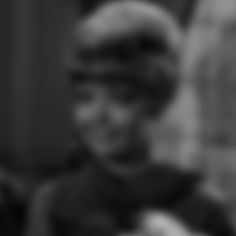

In [20]:
#21x21 Gaussian Blur
import cv2
# Tentukan ukuran kernel Gaussian
kernel_size = 21
sigma = math.sqrt(kernel_size)

# Dapatkan kernel Gaussian
gaussian_kernel = cv2.getGaussianKernel(kernel_size, sigma)

# Buat kernel Gaussian 2D (21x21)
gauss_kernel = np.outer(gaussian_kernel, gaussian_kernel)

# Normalisasi kernel
gauss_kernel /= gauss_kernel.sum()

# memiliki kernel Gaussian 21x21 yang dapat digunakan dalam fungsi convolution2d
cv2_imshow(convolution2d(img_gray, gauss_kernel, 1, 0))



# Diketahui dataset KTP dengan kondisi citra yang berbeda. Lakukan perbaikan melalui implementasi teknik filterisasi dan detection setiap citra. Terapkan juga histogram equalization dan operasi aritmatika sebagai Teknik pendukung perbaikan citra KTP.

In [21]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [39]:
from IPython.display import display, Image  # Import modul yang diperlukan di Google Colab
import cv2
import numpy as np
import os

# Mount Google Drive (jika belum terhubung)
from google.colab import drive
drive.mount('/content/drive')

# Tentukan path folder yang berisi citra KTP
folder_path = '/content/drive/MyDrive/KTP/KTP_More'

# List semua berkas dalam folder
file_list = os.listdir(folder_path)

# Load citra referensi
reference_image = cv2.imread('/content/drive/MyDrive/KTP/Reference/reference.jpg', cv2.IMREAD_GRAYSCALE)

# Loop melalui setiap berkas citra dalam folder
for file_name in file_list:
    if file_name.endswith('.jpg'):
        # Baca citra KTP
        ktp_image = cv2.imread(os.path.join(folder_path, file_name), cv2.IMREAD_GRAYSCALE)

        # Histogram Equalization
        equalized_image = cv2.equalizeHist(ktp_image)

        # Gaussian Filtering
        blurred_image = cv2.GaussianBlur(equalized_image, (5, 5), 0)

        # Penggabungan dengan citra referensi
        ktp_with_reference = cv2.addWeighted(blurred_image, 0.7, reference_image, 0.3, 0)

        # Tampilkan citra hasil dalam notebook
        display(Image(data=cv2.imencode('.jpg', ktp_with_reference)[1].tobytes()))

# Tutup semua jendela citra (jika ada)
cv2.destroyAllWindows()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
